In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import os
os.environ['OMP_NUM_THREADS'] = "8"
import numpy as np
import scipy
import glob
import sys
import pdb
sys.path.append('/home/creichardt/spt3g_software/build')
sys.path.append('/home/creichardt/.local/lib/python3.10')
#cdir = '/home/creichardt/SPT3G_JAX_Likelihood/chains_hiell_20250820/'
cdir = '/home/creichardt/SPT3G_JAX_Likelihood/chains_hiell_202510/'

In [2]:
cfiles=['chain_hiell_nontemplate_sz_powerlaw_phys_0.npz',
'chain_hiell_nontemplate_lotsosz_scaled_phys_0.npz',
'chain_hiell_nontemplate_lotsosz_scaled_physzero_0.npz',
#        'chain_hiell_nontemplate_sz_scaled_phys_3ksz_0.npz',#'chain_hiell_nontemplate_sz_scaled_phys_0.npz',
       'chains_hiell_shang07_0.npz', #'chains_hiell_0.npz',
        'chains_hiell_agoratszksztszcib_0.npz',
        'chain_hiell_nontemplate_sz_powerlaw_phys_agora_0.npz',
        'chain_hiell_nontemplate_sz_template_phys_0.npz',
         '../chains_hiell_20251021/chain_hiell_nontemplate_sz_powerlaw_phys_0.npz',
        '../chains_hiell_20251021/chain_hiell_nontemplate_lotsosz_scaled_phys_0.npz'
       ]

templates = [cdir+'../foreground_templates/dl_shaw_tsz_s10_153ghz_norm1_fake25000.txt',
             cdir+'../foreground_templates/dl_shaw_tsz_s10_153ghz_norm1_fake25000.txt',
                          cdir+'../foreground_templates/dl_shaw_tsz_s10_153ghz_norm1_fake25000.txt',
             cdir+'../foreground_templates/dl_shaw_tsz_s10_153ghz_norm1_fake25000.txt',
             cdir+'../foreground_templates/dl_tsz_agora_fluxcut6mjy_norm1_l25000.txt',
            cdir+'../foreground_templates/dl_tsz_agora_fluxcut6mjy_norm1_l25000.txt',
            cdir+'../foreground_templates/dl_shaw_tsz_s10_153ghz_norm1_fake25000.txt',
            cdir+'../foreground_templates/dl_shaw_tsz_s10_153ghz_norm1_fake25000.txt',
             cdir+'../foreground_templates/dl_shaw_tsz_s10_153ghz_norm1_fake25000.txt']

scale = [False, True,True,False, False, False,False,False,True]
powerlaw = [True, False, False,False, False, True,False,True,False]
colors=['black','blue','blue','blue','orange','black','darkgreen','purple','grey']#,'orange','purple']
lses = ['-','--',':','--','-.','-','-','-','-']
#colors=['black','blue','blue','blue','orange','red','purple']#,'orange','purple']
#lses = ['-',':','--','--','--','-']
labels=['CIB free, $\\ell^\\alpha$ G15 SZ', 'CIB+SZ free','CIB+SZ free ($\\xi(\\ell\\geq 6000)=0$)',' G15 SZ','Agora templates','CIB free, $\\ell^\\alpha$ Agora SZ','CIB free, G15 SZ','CIB free, $\\ell^\\alpha$ G15 SZ recal','CIB+SZ free recal'] 


In [3]:
def get_68pc(wt,par):
    totwt = np.sum(wt)
    srted = np.argsort(par) 
    swt = wt[srted]
    scc = par[srted]
    cum = np.cumsum(swt)
    half=0.6827/2.
    imed = (np.where(cum < totwt/2))[-1][-1]
    iminus = (np.where(cum < totwt*(0.5-half)))[-1][-1]
    iplus = (np.where(cum < totwt*(0.5+half)))[-1][-1]
    #pdb.set_trace()
    return scc[imed],scc[iminus],scc[iplus]

In [4]:
def process_chain_posterior(cfile,template,nskip=30000,ells = np.arange(100,11001,200,dtype=int),color='black',label=None,scaled=False,powerlaw=False):
    with np.load(cfile,allow_pickle=True) as fp:
        print(fp.files)
        chain = fp['chain']
        params= fp['chain_params']
    

    print(template)
    vec = np.loadtxt(template)
    l = vec[:,0]
    odl= vec[:,1]
    l0 = int(l[0]+.001)
    odl /= odl[3000-l0]
    dl = scipy.signal.medfilt(odl,53)
    use_dl = dl[ells] #subset of dl at specified ells
    if not scaled and not powerlaw:
        wtind = params == 'weight'
        ind = params == 'D3000_143ghz_tsz'
        wt = chain[nskip:, wtind].flatten()
        cc = chain[nskip:, ind].flatten()

        med,minussigma,plussigma = get_68pc(wt,cc)
        #pdb.set_trace()
        return ells, use_dl*med,use_dl*minussigma,use_dl*plussigma

    else:
        if powerlaw:
            tdl = dl[:12000]
            use_dl = dl[ells]
            
            wtind = params == 'weight'
            wt = chain[nskip:,wtind]
            ind = params == 'D3000_143ghz_tsz'
            cc = chain[nskip:,ind]
            ind = params == 'alpha_tsz'
            aa = chain[nskip:,ind]
            nl = ells.shape[0]
            nc = cc.shape[0]
            test = np.zeros([nc,nl])
            for i in range(nc):
                test[i,:] = cc[i] * (ells/3000)**aa[i] * use_dl
        else:
            tdl = dl[:12000]
            use_dl = dl[ells]
            
            wtind = params == 'weight'
            wt = chain[nskip:,wtind]
            ind = params == 'D1000_143ghz_tsz'
            cc1000 = chain[nskip:,ind]
            ind = params == 'D2000_143ghz_tsz'
            cc2000 = chain[nskip:,ind]
            ind = params == 'D3000_143ghz_tsz'
            cc3000 = chain[nskip:,ind]
            ind = params == 'D4000_143ghz_tsz'
            cc4000 = chain[nskip:,ind]
            ind = params == 'D5000_143ghz_tsz'
            cc5000 = chain[nskip:,ind]
            ind = params == 'D6000_143ghz_tsz'
            cc6000 = chain[nskip:,ind]
            ind = params == 'D7000_143ghz_tsz'
            cc7000 = chain[nskip:,ind]
            ind = params == 'D8000_143ghz_tsz'
            cc8000 = chain[nskip:,ind]
            ind = params == 'D9000_143ghz_tsz'
            cc9000 = chain[nskip:,ind]
            ind = params == 'D10000_143ghz_tsz'
            cc10000 = chain[nskip:,ind]
            ind = params == 'D11000_143ghz_tsz'
            cc11000 = chain[nskip:,ind]
            ind = params == 'D12000_143ghz_tsz'
            cc12000 = chain[nskip:,ind]

            nl = ells.shape[0]
            nc = cc3000.shape[0]
            test = np.zeros([nc,nl])
            
            ls = np.asarray([0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,16000])
            for i in range(nc):
                ys= np.asarray([cc1000[i],cc1000[i],cc2000[i],cc3000[i],cc4000[i],cc5000[i],cc6000[i],cc7000[i],cc8000[i],cc9000[i],cc10000[i],cc11000[i],cc12000[i],cc12000[i]])
                cs = scipy.interpolate.PchipInterpolator(ls,ys)
                #pdb.set_trace()
                test[i,:] = ((cs(ells).flatten()))*use_dl
        med   = use_dl*0.0
        minus = med*0.0
        plus  = med*0.0
        for i in range(nl):
            med0,minus0,plus0 = get_68pc(wt,test[:,i].flatten())
            med[i]   = med0
            minus[i] = minus0
            plus[i]  = plus0

        return ells, med, minus, plus





In [5]:
pells={}
pmed={}
pminus = {}
pplus = {}
for i in range(9):
    ells, med, minus, plus = process_chain_posterior(cdir+cfiles[i],templates[i],scaled=scale[i],powerlaw=powerlaw[i])
    pells[i]=ells
    pmed[i]=med
    pplus[i]=plus
    pminus[i]=minus


['chain', 'chain_params', 'model', 'dataset']
/home/creichardt/SPT3G_JAX_Likelihood/chains_hiell_202510/../foreground_templates/dl_shaw_tsz_s10_153ghz_norm1_fake25000.txt
['chain', 'chain_params', 'model', 'dataset']
/home/creichardt/SPT3G_JAX_Likelihood/chains_hiell_202510/../foreground_templates/dl_shaw_tsz_s10_153ghz_norm1_fake25000.txt
['chain', 'chain_params', 'model', 'dataset']
/home/creichardt/SPT3G_JAX_Likelihood/chains_hiell_202510/../foreground_templates/dl_shaw_tsz_s10_153ghz_norm1_fake25000.txt
['chain', 'chain_params', 'model', 'dataset']
/home/creichardt/SPT3G_JAX_Likelihood/chains_hiell_202510/../foreground_templates/dl_shaw_tsz_s10_153ghz_norm1_fake25000.txt
['chain', 'chain_params', 'model', 'dataset']
/home/creichardt/SPT3G_JAX_Likelihood/chains_hiell_202510/../foreground_templates/dl_tsz_agora_fluxcut6mjy_norm1_l25000.txt
['chain', 'chain_params', 'model', 'dataset']
/home/creichardt/SPT3G_JAX_Likelihood/chains_hiell_202510/../foreground_templates/dl_tsz_agora_fluxc

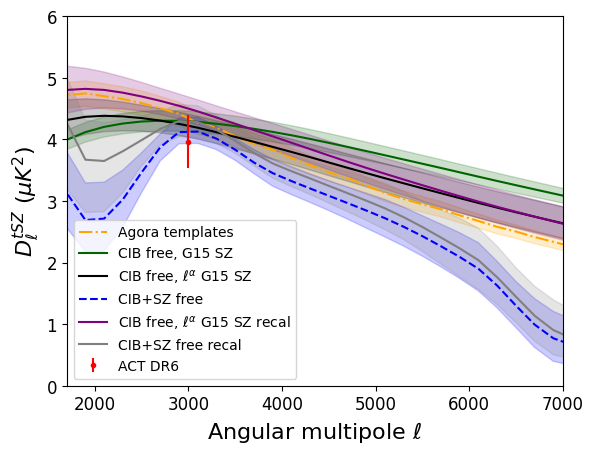

In [6]:
#ind = [0,4,1,2,3]

#for i in ind:
#for i in range(6):
ind = [4,5,6,1,2]
ind = [4,6,0,1,7,8]
for i in ind:
    plt.plot(pells[i],pmed[i],color=colors[i],label=labels[i],linestyle=lses[i])
    plt.fill_between(pells[i], pminus[i], pplus[i],color=colors[i],alpha=0.2)

plt.errorbar([3000],[3.96],yerr=[0.43],fmt='.',label='ACT DR6',color='red')
plt.xlim([1700,7000])
plt.ylim([0,6])
plt.ylabel('$D^{tSZ}_\\ell$ ($\\mu K^2$)',fontsize=16)
plt.xlabel('Angular multipole $\\ell$',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
#plt.savefig('tsz-ell-lots.pdf')
plt.show()



In [ ]:
with np.load(cdir+'chain_hiell_nontemplate_manysz_scaled_phys_0.npz',allow_pickle=True) as fp:
        chain = fp['chain']
        params= fp['chain_params']

In [ ]:
print(pells[1][9:])
print(labels[1],pmed[1][9:])
print(labels[2],pmed[2][9:])
print(labels[3],pmed[3][9:])

In [ ]:
plt.plot(chain[:,11])

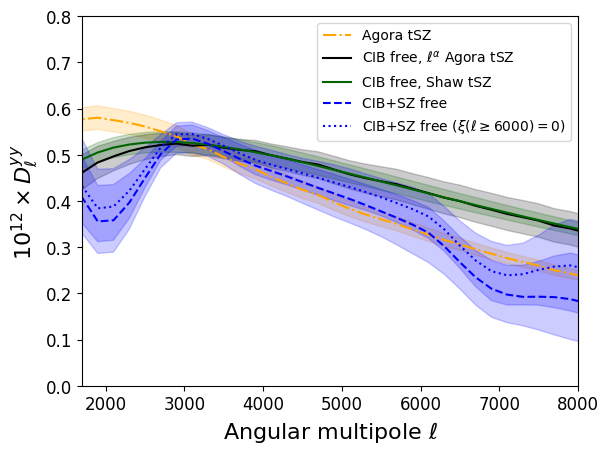

In [21]:
#ind = [0,4,1,2,3]

#for i in ind:
#for i in range(6):
#ind = [4,5,1,2,6]
ind = [4,5,6,1,2]
x=143/56.85
fxsquared=(x/np.tanh(x/2.) - 4.)**2
renorm=2.726**(-2)/fxsquared
for i in ind:
    plt.plot(pells[i],pmed[i]*renorm,color=colors[i],label=labels[i],linestyle=lses[i])
    plt.fill_between(pells[i], pminus[i]*renorm, pplus[i]*renorm,color=colors[i],alpha=0.2)

plt.xlim([1700,8000])
plt.ylim([0.,0.8])
#plt.yscale('log')
#plt.yticks(ticks=[0.1,0.2,0.5,1,2])
plt.legend()
plt.ylabel('$10^{12} \\times D^{yy}_\\ell$' ,fontsize=16) #($\\mu K^2$)'
plt.xlabel('Angular multipole $\\ell$',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)#,ticks=[0.1,0.2,0.3,0.4,0.5,0.6,0.7],labels=[0.1,0.2,0.3,0.4,0.5,0.6,0.7])

plt.savefig('yy-ell-lots.pdf')
plt.show()


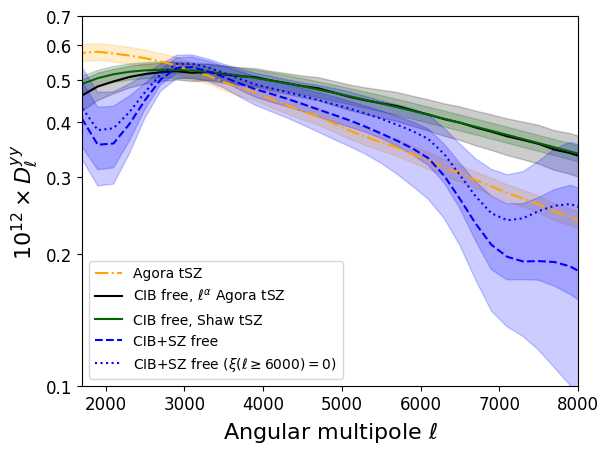

In [22]:
#ind = [0,4,1,2,3]

#for i in ind:
#for i in range(6):
#ind = [4,5,1,2,6]
ind = [4,5,6,1,2]
x=143/56.85
fxsquared=(x/np.tanh(x/2.) - 4.)**2
renorm=2.726**(-2)/fxsquared
for i in ind:
    plt.plot(pells[i],pmed[i]*renorm,color=colors[i],label=labels[i],linestyle=lses[i])
    plt.fill_between(pells[i], pminus[i]*renorm, pplus[i]*renorm,color=colors[i],alpha=0.2)

plt.xlim([1700,8000])
plt.ylim([0.1,0.7])
plt.yscale('log')
#plt.yticks(ticks=[0.1,0.2,0.5,1,2])
plt.legend()
plt.ylabel('$10^{12} \\times D^{yy}_\\ell$' ,fontsize=16) #($\\mu K^2$)'
plt.xlabel('Angular multipole $\\ell$',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12,ticks=[0.1,0.2,0.3,0.4,0.5,0.6,0.7],labels=[0.1,0.2,0.3,0.4,0.5,0.6,0.7])

plt.savefig('yy-ell-lots-log.pdf')
plt.show()


In [ ]:
sz.shape

In [ ]:
sz[6000,:]

In [3]:
import numpy as np
T_CMB = 2.72548 # CMB temperature
PLANCK_h = 6.62606957e-34 # Planck's constant
BOLTZMANN_kB = 1.3806488e-23 # Boltzmann constant
GHz_KELVIN = PLANCK_h/BOLTZMANN_kB*1e9 # Useful shortcut for black-body related functions

def black_body_deriv(nu: np.float64, nu0: np.float64, T: np.float64) -> np.float64:
    """
    Derivative of black body function, normalised to 1 at nu0.
    Based on code from Christian Reichardt.

    Arguments
    -------
    T : float
        Temperature.
    nu0 : float
        Reference frequency.
    nu : float
        Requested frequency.

    Returns
    -------
    float :
        Frequency scaling
    """

    x0 = GHz_KELVIN * nu0 / T
    x = GHz_KELVIN * nu / T
    dBdT0 = x0**4 * np.exp(x0) / (np.exp(x0)-1)**2
    dBdT =  x**4 * np.exp(x) / (np.exp(x)-1)**2
    dBdT = dBdT/dBdT0

    return dBdT
def black_body(nu: np.float64, nu0: np.float64, T: np.float64) -> np.float64:
    """                                                                                                                                                
    Black body function, normalised to 1 at nu0.                                                                                                       
    Based on code from Christian Reichardt.                                                                                                            
                                                                                                                                                       
    Arguments                                                                                                                                          
    -------                                                                                                                                            
    T : float                                                                                                                                          
        Temperature.                                                                                                                                   
    nu0 : float                                                                                                                                        
        Reference frequency.                                                                                                                           
    nu : float                                                                                                                                         
        Requested frequency.                                                                                                                           
                                                                                                                                                       
    Returns                                                                                                                                            
    -------                                                                                                                                            
    float :                                                                                                                                            
        Frequency scaling                                                                                                                              
    """

    fac = (nu/nu0)**3
    fac *= (np.exp(GHz_KELVIN*nu0/T)-1)/(np.exp(GHz_KELVIN*nu/T)-1)

    return fac

def modBB(fri,frj, fr0, T, beta, sigmasq):
    frqdep = ((fri*frj)/(fr0*fr0))**(beta)
    frqdep *= black_body(fri,fr0,T)*black_body(frj,fr0,T)
    frqdep *= ((fri*frj)/(fr0*fr0))**( np.log(fri/fr0*frj/fr0)/2 * sigmasq )
    frqdep /=  (black_body_deriv(fri,fr0,T_CMB) * black_body_deriv(frj,fr0,T_CMB)) # to keep in CMB units                      
    return frqdep


def powerlaw(fri,frj, fr0, beta, sigmasq):
    frqdep = ((fri*frj)/(fr0*fr0))**(beta)
    frqdep *= ((fri*frj)/(fr0*fr0))**( np.log(fri/fr0*frj/fr0)/2 * sigmasq)
    frqdep /=  (black_body_deriv(fri,fr0,T_CMB) * black_body_deriv(frj,fr0,T_CMB)) # to keep in CMB units
    return frqdep


In [4]:
x=150/56.85
fxsquared=(x/np.tanh(x/2.) - 4.)**2

x=95/56.85
fxsquaredb=(x/np.tanh(x/2.) - 4.)**2
print(fxsquaredb/fxsquared)

2.6491870807090105


In [14]:
powerlaw(95,95,150, .2, 0)

2.714265685364057

In [3]:
x=145/56.85
fxsquared=(x/np.tanh(x/2.) - 4.)**2
renorm=2.726**(-2)/fxsquared
print(renorm)

0.12994104237124873


In [5]:
200 * (renorm)**0.5 / 1e6


7.209467175076083e-05

In [ ]:
x=145/56.85
fxsquared=(x/np.tanh(x/2.) - 4.)**2
renorm=2.726**(-2)/fxsquared
print(renorm)